In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import re
import cv2
cols = ['sr','count','hate_speech','offensive_language','neither','class','tweet']
df = pd.read_csv("./Easydata/labeled_data.csv",header=None, names=cols)
df = df.drop(['sr','count','hate_speech','offensive_language','neither'],axis = 1)
df = df.drop(df.index[0],axis = 0)
df.head()

,class,tweet
1,2,!!! RT @mayasolovely: As a woman you shouldn't...
2,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
3,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
4,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
5,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [2]:
output = np.array(df['class'],dtype=int)
tweet = np.array(df['tweet'],dtype= str)
df1 = pd.DataFrame([output,tweet])
df = df1.T
df.columns = ['output','tweet']

In [3]:
output

array([2, 1, 1, ..., 1, 1, 2])

In [4]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [5]:
print ("Cleaning and parsing the tweets")
cleaning = df.iloc[:,1]
result = []
for t in cleaning:
    result.append(tweet_cleaner(t))
result
print ("Cleaning Finished")
df['text'] = result

Cleaning and parsing the tweets
Cleaning Finished


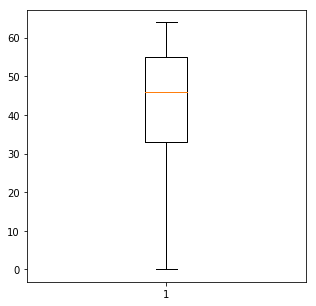

count    24783.000000
mean        43.265706
std         14.964423
min          0.000000
25%         33.000000
50%         46.000000
75%         55.000000
max         64.000000
Name: clean_len, dtype: float64

In [6]:
df['clean_len'] = [len(t) for t in df.text]
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.clean_len)
plt.show()
df.clean_len.describe()


In [7]:
df

,output,tweet,text,clean_len
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt as a woman you shouldn t complain about cl,45
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt boy dats cold tyga dwn bad for cuffin dat h,46
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt dawg rt you ever fu,22
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt g anderson based she look like a tranny,42
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt the shit you hear about me mig,33
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",madison x the shit just blows me claim y,40
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",brighterdays i can not just sit up and hate on...,53
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause i m tired of you big bitches c,36
8,1,""" &amp; you might not get ya bitch back &amp; ...",you might not get ya bitch back thats that,42
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbies include fighting mariam bitch,37


## Common Words in Hate Speech 

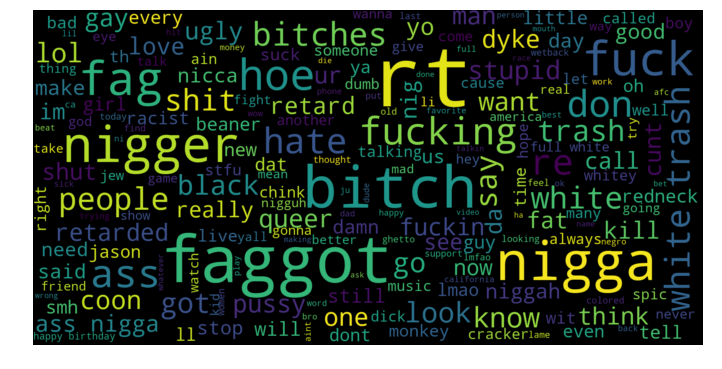

In [8]:
neg_tweets = df[df.output == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Common Words in Offensive Speech 

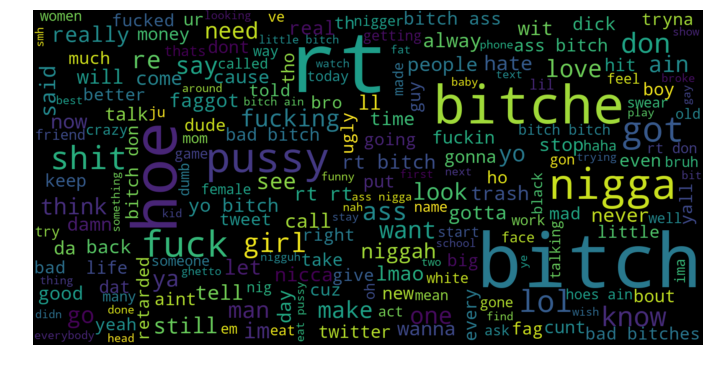

In [9]:
neu_tweets = df[df.output == 1]
neu_string = []
for t in neu_tweets.text:
    neu_string.append(t)
neu_string = pd.Series(neu_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Other Words 

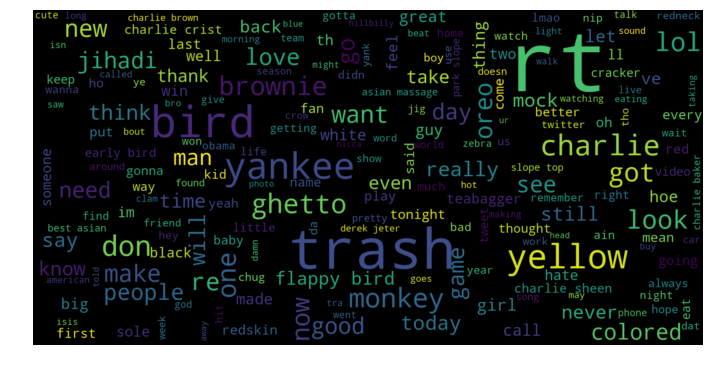

In [10]:
nei_tweets = df[df.output == 2]
nei_string = []
for t in nei_tweets.text:
    nei_string.append(t)
nei_string = pd.Series(nei_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(nei_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
df['text']

0            rt as a woman you shouldn t complain about cl
1           rt boy dats cold tyga dwn bad for cuffin dat h
2                                   rt dawg rt you ever fu
3               rt g anderson based she look like a tranny
4                        rt the shit you hear about me mig
5                 madison x the shit just blows me claim y
6        brighterdays i can not just sit up and hate on...
7                     cause i m tired of you big bitches c
8               you might not get ya bitch back thats that
9                    hobbies include fighting mariam bitch
10       keeks is a bitch she curves everyone lol i wal...
11                          murda gang bitch its gang land
12              so hoes that smoke are losers yea go on ig
13               bad bitches is the only thing that i like
14                                     bitch get up off me
15                             bitch nigga miss me with it
16                                      bitch plz whatev

In [12]:
df1 = df[['output','text']]

In [13]:
maxcount = 0
shape = np.shape(df1.text)
for i in range(shape[0]):
    line = df1.text[i]
    count = len(re.findall(r'\w+', line))
    maxcount = count if count > maxcount else maxcount
print ('Maximum number of words in a line is ' + str(maxcount))


Maximum number of words in a line is 19


## WORD2VEC

In [14]:
df1.text

0            rt as a woman you shouldn t complain about cl
1           rt boy dats cold tyga dwn bad for cuffin dat h
2                                   rt dawg rt you ever fu
3               rt g anderson based she look like a tranny
4                        rt the shit you hear about me mig
5                 madison x the shit just blows me claim y
6        brighterdays i can not just sit up and hate on...
7                     cause i m tired of you big bitches c
8               you might not get ya bitch back thats that
9                    hobbies include fighting mariam bitch
10       keeks is a bitch she curves everyone lol i wal...
11                          murda gang bitch its gang land
12              so hoes that smoke are losers yea go on ig
13               bad bitches is the only thing that i like
14                                     bitch get up off me
15                             bitch nigga miss me with it
16                                      bitch plz whatev

In [15]:
import bcolz
import pickle
words = []
idx = 0
word2idx = {}
vectors = bcolz.carray(np.zeros(1), rootdir='./Datfile/6B.50.dat', mode='w')

with open('./Datfile/glove.6B.50d.txt', 'rb') as f:
    for l in f:
        line = l.decode().split()
        word = line[0]
        words.append(word)
        word2idx[word] = idx
        idx += 1
        vect = np.array(line[1:]).astype(np.float)
        vectors.append(vect)
    
vectors = bcolz.carray(vectors[1:].reshape((400000, 50)), rootdir='./Datfile/6B.50.dat', mode='w')
vectors.flush()
pickle.dump(words, open('./Datfile/6B.50_words.pkl', 'wb'))
pickle.dump(word2idx, open('./Datfile/6B.50_idx.pkl', 'wb'))

In [16]:
vectors = bcolz.open('./Datfile/6B.50.dat')[:]
words = pickle.load(open('./Datfile/6B.50_words.pkl', 'rb'))
word2idx = pickle.load(open('./Datfile/6B.50_idx.pkl', 'rb'))

glove = {w: vectors[word2idx[w]] for w in words}

In [17]:
glove['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

In [18]:
target_vocab = df1['text'].str.split(' ', expand=True).stack().unique()
matrix_len = len(target_vocab)
weights_matrix = np.zeros((matrix_len, 50))
words_found = 0
words_added = 0
for i, word in enumerate(target_vocab):
    try: 
        weights_matrix[i] = glove[word]
        words_found += 1
    except KeyError:
        words_added += 1
        weights_matrix[i] = np.random.normal(scale=0.6, size=(50, ))
        
words_found+words_added-np.size(target_vocab)
np.shape(weights_matrix)

(17555, 50)

In [19]:
myglove = {}
keys = target_vocab
shape = np.shape(weights_matrix)
for i,x in zip(keys,range(shape[0])): 
        myglove[i] = weights_matrix[x]

In [20]:
from PIL import Image
def create_vec (qaz):
    arr = np.array([0]*50,dtype=float)
    #qaz = df1.text[9]
    qazz = qaz.split()
    qazz
    t = 0
    for i in qazz:
        arr += list(myglove[i])
        t = t+1 
    arr = arr#/np.size(qazz)
    return (arr)


create_vec(df1.text[9])

array([-0.79206   ,  1.11216   , -1.5437357 , -0.88307   , -1.48591   ,
        0.9487905 , -0.08443   , -1.97632   ,  0.521675  , -0.0973    ,
       -0.983329  ,  0.24285   , -1.37924   , -1.95938   ,  1.760479  ,
       -0.325646  , -0.30944   ,  1.444226  ,  2.19173   ,  0.59233   ,
       -0.58331   ,  2.159377  ,  1.878941  ,  2.390442  , -0.19064   ,
       -3.58538   , -4.093239  , -1.8607    ,  1.19838   , -0.1111    ,
        6.54164   ,  1.901695  , -1.695525  ,  2.286287  ,  0.50417   ,
        2.33151   , -1.829891  , -0.6139    , -1.3101    ,  0.563261  ,
       -0.204077  ,  0.990676  , -0.323087  ,  1.14891917,  2.54185   ,
       -2.28875   ,  0.2666418 , -2.008896  , -0.96494   , -0.74111   ])

In [21]:
import keras
from keras.models import Sequential, Model
from keras.layers import Activation, Dense 

/home/harsh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
X = np.empty([24783,50])
t =0
for i in range(np.shape(df1.text)[0]):
    X[i,:] = create_vec(df1.text[t])
    #X.insert(i,arr)
    t = t+1
type(X)


numpy.ndarray

In [23]:
Y = df.output

In [24]:
model = Sequential()
model.add(Dense(1000, input_dim=50, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [25]:
X_train = X[:20000]
y_train = Y[:20000]
X_test = X[20000:]
y_test = Y[20000:]

In [26]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=64,verbose=1)

Train on 15000 samples, validate on 5000 samples
Epoch 1/30
15000/15000 [==============================] - 2s 100us/step - loss: 0.6561 - acc: 0.7662 - val_loss: 0.5540 - val_acc: 0.7972
Epoch 2/30
15000/15000 [==============================] - 1s 82us/step - loss: 0.5968 - acc: 0.7825 - val_loss: 0.5472 - val_acc: 0.8026
Epoch 3/30
15000/15000 [==============================] - 1s 82us/step - loss: 0.5784 - acc: 0.7897 - val_loss: 0.5104 - val_acc: 0.8098
Epoch 4/30
15000/15000 [==============================] - 1s 82us/step - loss: 0.5615 - acc: 0.7966 - val_loss: 0.5109 - val_acc: 0.8128
Epoch 5/30
15000/15000 [==============================] - 1s 83us/step - loss: 0.5545 - acc: 0.7963 - val_loss: 0.5062 - val_acc: 0.8142
Epoch 6/30
15000/15000 [==============================] - 1s 83us/step - loss: 0.5451 - acc: 0.8001 - val_loss: 0.5826 - val_acc: 0.7602
Epoch 7/30
15000/15000 [==============================] - 1s 82us/step - loss: 0.5403 - acc: 0.7982 - val_loss: 0.5061 - val_acc

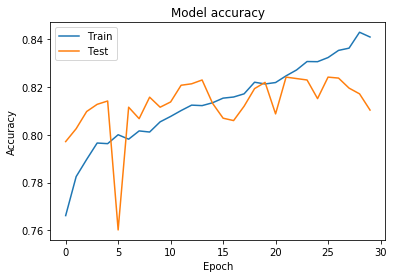

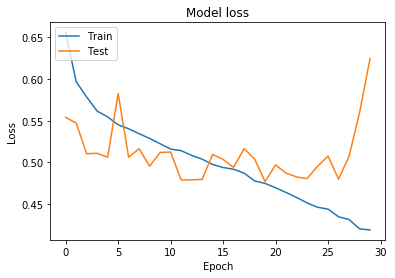

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4783/4783 [==============================] - 0s 35us/step

acc: 82.52%


### Other Stratagies We Tried

arr = np.array(weights_matrix)
im = Image.fromarray(arr,mode = 'L')
#im.save('embedding.png')

def lstm_model(sequence_length, embedding_dim):
    model_variation = 'LSTM'
    ##print('Model variation is %s' % model_variation)
    model = Sequential()
    model.add(Embedding(len(target_vocab), 50, input_length=sequence_length, trainable=None))
    model.add(Dropout(0.25))#, input_shape=(sequence_length, embedding_dim)))
    model.add(LSTM(50))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
    ##print model.summary()
    return model


X , y , sen = [],[] ,[]
i = 0
for p in range(np.size(df1.text)):    
    qaz = df1.text[i]
    qazz = qaz.split()
    sen = []
    for m in qazz:
        sen.append(myglove[m])
    #Dsen = pd.DataFrame(sen)
    X.insert(i,sen)
    i = i+1
y = df1.output
data = X
data = pad_sequences(X,padding='post',dtype=float)

y = np.array(y)
data, y = sklearn.utils.shuffle(data, y)
weights = weights_matrix
q = np.size(data)
model = lstm_model(q, 50)
epochs=10
batch_size=8
inp_dim = 50
X = data
p, r, f1 = 0., 0., 0.
p1, r1, f11 = 0., 0., 0.
sentence_len = 19 #X.shape[1]
model.layers[0].set_weights([weights])

X_train, y_train = X[:20000], y[:20000]
X_test, y_test = X[20000:], y[20000:]

y_train = y_train.reshape((len(y_train), 1))
X_temp = np.hstack((X_train, y_train))
for epoch in xrange(epochs):    
    print('Iteration number'+ str(epoch))
    for X_batch in batch_gen(X_temp, batch_size):
        x = X_batch[:, :sentence_len]
        y_temp = X_batch[:, sentence_len]
        class_weights = None
        if SCALE_LOSS_FUN:
            class_weights = {}
            class_weights[0] = np.where(y_temp == 0)[0].shape[0]/float(len(y_temp))
            class_weights[1] = np.where(y_temp == 1)[0].shape[0]/float(len(y_temp))
            class_weights[2] = np.where(y_temp == 2)[0].shape[0]/float(len(y_temp))
        try:
            y_temp = np_utils.to_categorical(y_temp, nb_classes=3)
        except Exception as e:
            print( e)
            ##print y_temp
        ##print x.shape, y.shape
        loss, acc = model.train_on_batch(x, y_temp, class_weight=class_weights)
        print ("loss" + str(loss))
        print("accuracy" + str(acc))

y_pred = model.predict_on_batch(X_test)
y_pred = np.argmax(y_pred, axis=1)
print (classification_report(y_test, y_pred))
##print precision_recall_fscore_support(y_test, y_pred)
##print y_pred
p += precision_score(y_test, y_pred, average='weighted')
p1 += precision_score(y_test, y_pred, average='micro')
r += recall_score(y_test, y_pred, average='weighted')
r1 += recall_score(y_test, y_pred, average='micro')
f1 += f1_score(y_test, y_pred, average='weighted')
f11 += f1_score(y_test, y_pred, average='micro')


import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

def create_emb_layer(weights_matrix, non_trainable=False):
    num_embeddings, embedding_dim = np.shape(weights_matrix)#weights_matrix.size()
    emb_layer = nn.Embedding(num_embeddings, embedding_dim)
    emb_layer.load_state_dict(
        {'weight': weights_matrix})
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer, num_embeddings, embedding_dim

#resnet18 
model = torchvision.models.resnet18(pretrained=True)
num_chan_conv1 = model.conv1.out_channels
model.conv1 = nn.Linear(1,num_chan_conv1)
model

create_emb_layer(weights_matrix)
nn.Embedding.load_state_dict({'w':weights_matrix})

tok_corp = [df1['text'].str.split(' ', expand=True).stack().unique()]
import nltk
import gensim
from gensim import corpora, models, similarities
corpus = df1['text'].values.tolist() 
#tok_corp= [nltk.word_tokenize(sent.decode('utf-8')) for sent in corpus]                  
model = gensim.models.Word2Vec(tok_corp, min_count=1, size = 50)
#model.save('testmodel')
#model = gensim.models.Word2Vec.load('test_model')
#model.most_similar('word')
#model.most_similar([vector])